<img src= "https://raw.githubusercontent.com/e-sensing/sits/master/inst/extdata/sticker/sits_sticker.png" align="left" width="64"/>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64" />

# <span align="center" style="color:#336699" >Introduction to <b>sits</b> package</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/R/sits/sits-timeseries-classification.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Rolf Simoes<sup><a href="https://orcid.org/0000-0003-0953-4132"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Souza<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto Camara<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: November 28, 2022
</div>

<br/>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;">
<b>Abstract</b><br>
    <b>sits</b> is an open-source R package for satellite image time series analysis. The package supports the application of machine learning techniques for classification image time series obtained from data cubes.This Jupyter Notebook presents an overview of <b>sits</b> by showing an application example. This notebook corresponds to the Introduction chapter in the <a href="https://e-sensing.github.io/sitsbook/" target="_blank"> book on the SITS package</a>.
</div>    

<br/>
<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;font-size: 100%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>For a comprehensive sits overview and discussion, please, refer to the following online book:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Simoes, R; Camara, G.; Souza, F.; Santos, L.; Andrade, P.; Pelletier, C.; Carvalho, A.; Ferreira, K.; Queiroz, G. <a href="https://e-sensing.github.io/sitsbook/" target="_blank">sits: Satellite Image Time Series</a>.
    </div>
</div>

## How **sits** works?
<hr style="border:1px solid #0077b9;">

<img src="https://e-sensing.github.io/sitsbook/images/sits_general_view.png" width="500">

The package provides a set of tools for analysis, visualization and classification of satellite image time series. Users follow a typical workflow: 
- (a) `sits_cube()` Select an analysis-ready data image collection on cloud providers such as Brazil Data Cube, AWS, Microsoft Planetary Computer, Digital Earth Africa, and Swiss Data Cube.
- (b) `sits_regularize()` Build a regular data cube using the chosen image collection.
- (c) `sits_apply()` Obtain new bands and indices with operations on data cubes.
- (d) `sits_get_data()` Extract time series samples from the data cube to be used as training data.
- (e) `sits_som_map()` and `sits_kfold_validate()` Perform quality control and cross-validation in training samples.
- (f) `sits_train()` Train a machine learning model using the extracted samples.
- (g) `sits_classify()` Use the model to classify the data cube and get class probabilities for each pixel.
- (h) `sits_smooth()` Post-process the probability cube to remove outliers.
- (i) `sits_label_classify()` Produce a labeled map from the post-processed probability cube.
- (j) `sits_accuracy()` Evaluate the accuracy of the classification using best practices.

| **API_function** | **Inputs** | **Output** |
|---|---|---|
| `sits_cube()` | ARD image collection | Irregular data cube |
| `sits_regularize()` | Irregular data cube | Regular data cube |
| `sits_apply()` | Regular data cube | Regular data cube with new bands and indices |
| `sits_get_data()` | Data cube and sample locations | Time series |
| `sits_train()` | Time series and ML method | ML classification model |
| `sits_classify()` | ML classification model and regular data cube | Probability cube |
| `sits_smooth()` | Probability cube | Post-processed probability cube |
| `sits_label_classification()` | Post-processed probability cube | Classified map |
| `sits_accuracy()` | Classified map and validation samples | Accuracy assessment |

<img src="https://e-sensing.github.io/sitsbook/images/sits_api.png" width="500">

## Setup
<hr style="border:1px solid #0077b9;">

To prepare `sits` for this session in Kaggle, use the following command:

In [1]:
# install the bundle provided in the notebook
system("cp -u -R ../input/sits-bundle/sits-bundle/* /usr/local/lib/R/site-library/")

In [2]:
# load the sits library
library(sits)
library(sitsdata)

SITS - satellite image time series analysis.

Loaded sits v1.3.0.
        See ?sits for help, citation("sits") for use in publication.
        Documentation avaliable in https://e-sensing.github.io/sitsbook/.

Loaded sitsdata data sets v0.4.4. Use citation("sitsdata") for use in publication.



## Creating a Data Cube
<hr style="border:1px solid #0077b9;">


In [3]:
system.file("extdata/sinop", package = "sitsdata")

[1] "/usr/local/lib/R/site-library/sitsdata/extdata/sinop"

In [4]:
list.files(system.file("extdata/sinop", package = "sitsdata"))[1:5]

[1] "TERRA_MODIS_012010_CLOUD_2013-09-14.tif"
[2] "TERRA_MODIS_012010_CLOUD_2013-09-30.tif"
[3] "TERRA_MODIS_012010_CLOUD_2013-10-16.tif"
[4] "TERRA_MODIS_012010_CLOUD_2013-11-01.tif"
[5] "TERRA_MODIS_012010_CLOUD_2013-11-17.tif"

In [5]:
# create a data cube object based on the information about the files
sinop <- sits_cube(
  source = "BDC",
  collection = "MOD13Q1-6",
  data_dir = system.file("extdata/sinop", package = "sitsdata"),
  parse_info = c("X1", "X2", "tile", "band", "date")
)

  |======================================================================| 100%


In [6]:
# show the R object that describes the data cube
print(sinop)

# A tibble: 1 × 11
  source collection satellite sensor tile     xmin    xmax    ymin    ymax crs  
  <chr>  <chr>      <chr>     <chr>  <chr>   <dbl>   <dbl>   <dbl>   <dbl> <chr>
1 BDC    MOD13Q1-6  TERRA     MODIS  0120… -6.18e6 -5.96e6 -1.35e6 -1.23e6 "PRO…
# … with 1 more variable: file_info <list>


In [7]:
#sinop[["file_info"]][[1]][["path"]]

In [8]:
install.packages("tmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
sits_timeline(sinop)

[1] "2013-09-14" "2013-09-30" "2013-10-16" "2013-11-01" "2013-11-17"
 [6] "2013-12-03" "2013-12-19" "2014-01-01" "2014-01-17" "2014-02-02"
[11] "2014-02-18" "2014-03-06" "2014-03-22" "2014-04-07" "2014-04-23"
[16] "2014-05-09" "2014-05-25" "2014-06-10" "2014-06-26" "2014-07-12"
[21] "2014-07-28" "2014-08-13" "2014-08-29"

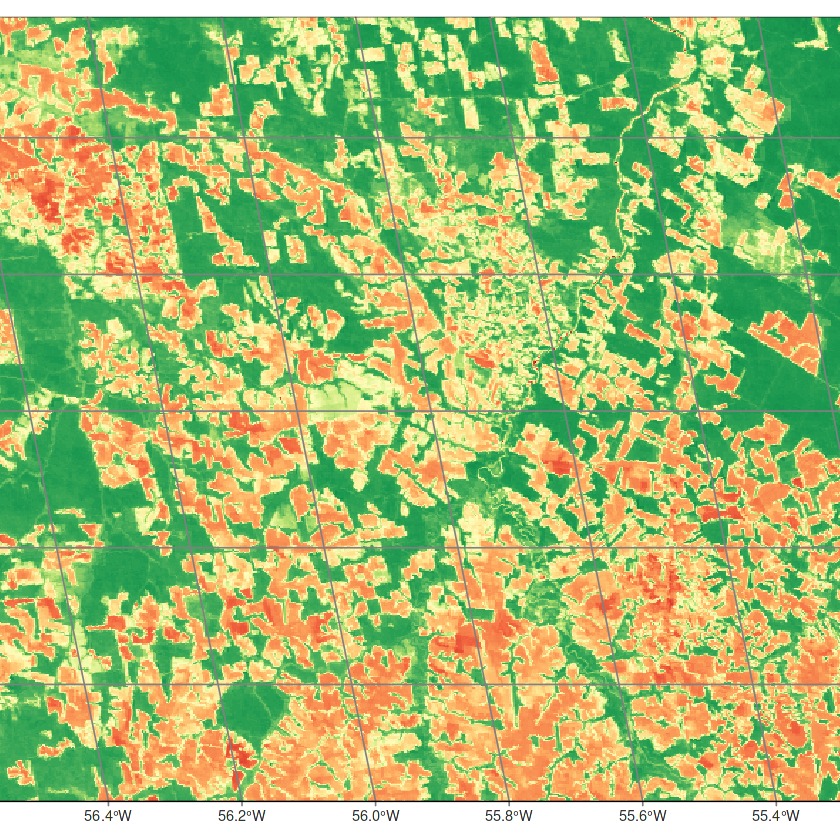

In [10]:
# plot a color composite  for the first date (2013-09-14)
plot(sinop, band = "NDVI", date = "2013-09-14")

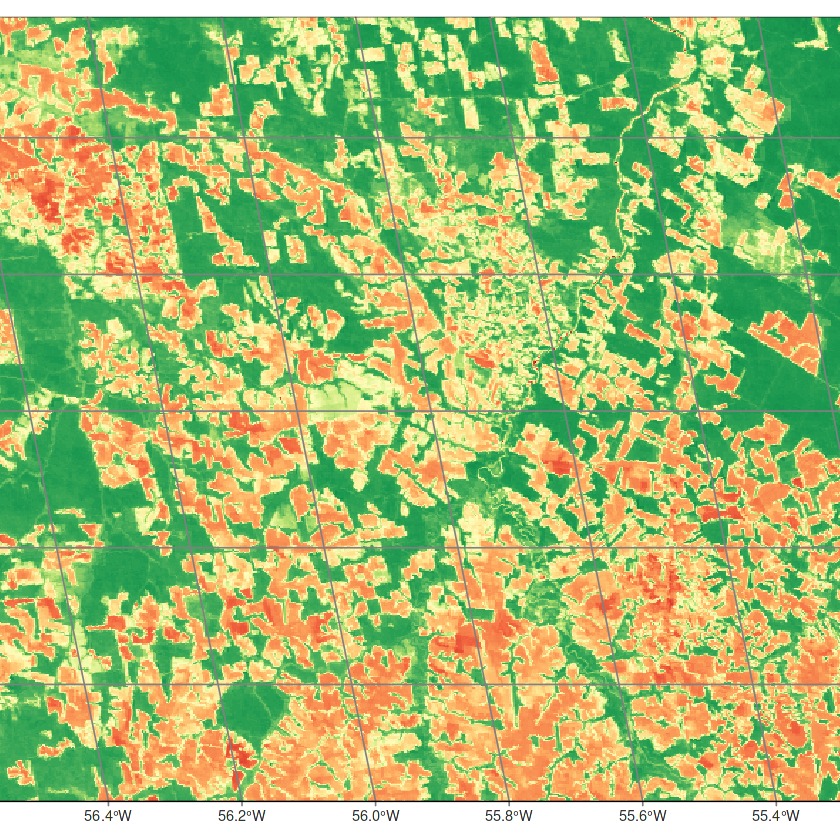

In [11]:
# plot NDVI band for the first date (2013-09-14)
plot(sinop, band = "NDVI", date = "2013-09-14")

In [12]:
#sits_bbox(sinop)

## The time series table
<hr style="border:1px solid #0077b9;">

In [13]:
# load the MODIS samples for Mato Grosso from the "sitsdata" package
library(tibble)
library(sitsdata)
data("samples_matogrosso_mod13q1", package = "sitsdata")
print(samples_matogrosso_mod13q1[1:2, ])

# A tibble: 2 × 7
  longitude latitude start_date end_date   label   cube     time_series      
      <dbl>    <dbl> <date>     <date>     <chr>   <chr>    <list>           
1     -57.8    -9.76 2006-09-14 2007-08-29 Pasture bdc_cube <tibble [23 × 5]>
2     -59.4    -9.31 2014-09-14 2015-08-29 Pasture bdc_cube <tibble [23 × 5]>


In [14]:
#samples_matogrosso_mod13q1$time_series[[1]]

In [15]:
sits_timeline(samples_matogrosso_mod13q1)

[1] "2006-09-14" "2006-09-30" "2006-10-16" "2006-11-01" "2006-11-17"
 [6] "2006-12-03" "2006-12-19" "2007-01-01" "2007-01-17" "2007-02-02"
[11] "2007-02-18" "2007-03-06" "2007-03-22" "2007-04-07" "2007-04-23"
[16] "2007-05-09" "2007-05-25" "2007-06-10" "2007-06-26" "2007-07-12"
[21] "2007-07-28" "2007-08-13" "2007-08-29"

In [16]:
# This is the directory where the local images are located
data_dir <- system.file("extdata/sinop", package = "sitsdata")
# here we list the first three files
list.files(data_dir)[1:3]

[1] "TERRA_MODIS_012010_CLOUD_2013-09-14.tif"
[2] "TERRA_MODIS_012010_CLOUD_2013-09-30.tif"
[3] "TERRA_MODIS_012010_CLOUD_2013-10-16.tif"

In [17]:
# configure graphs output
options(repr.plot.width = 8, repr.plot.height = 5)

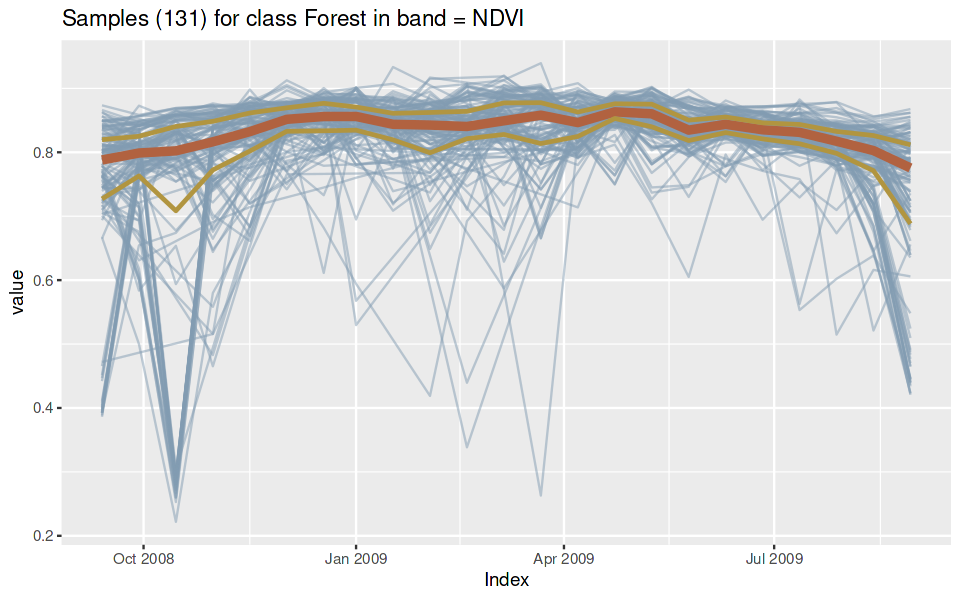

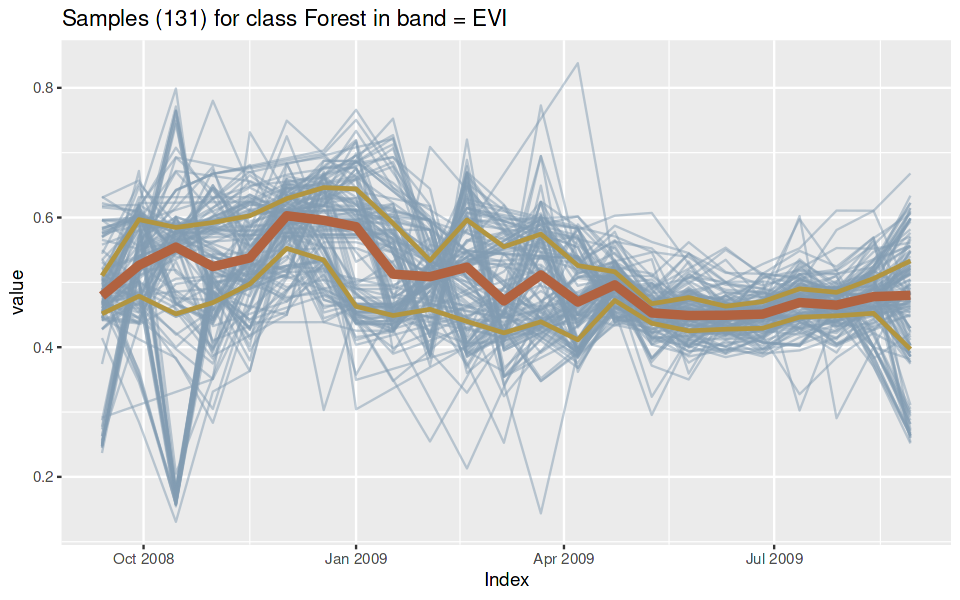

In [18]:
samples_forest <- dplyr::filter(
  samples_matogrosso_mod13q1,
  label == "Forest"
)
samples_forest_ndvi <- sits_select(
  samples_forest,
  band = c("NDVI", "EVI"),
)
plot(samples_forest_ndvi)

## Training a machine learning model
<hr style="border:1px solid #0077b9;">

In [19]:
#?sits_rfor

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



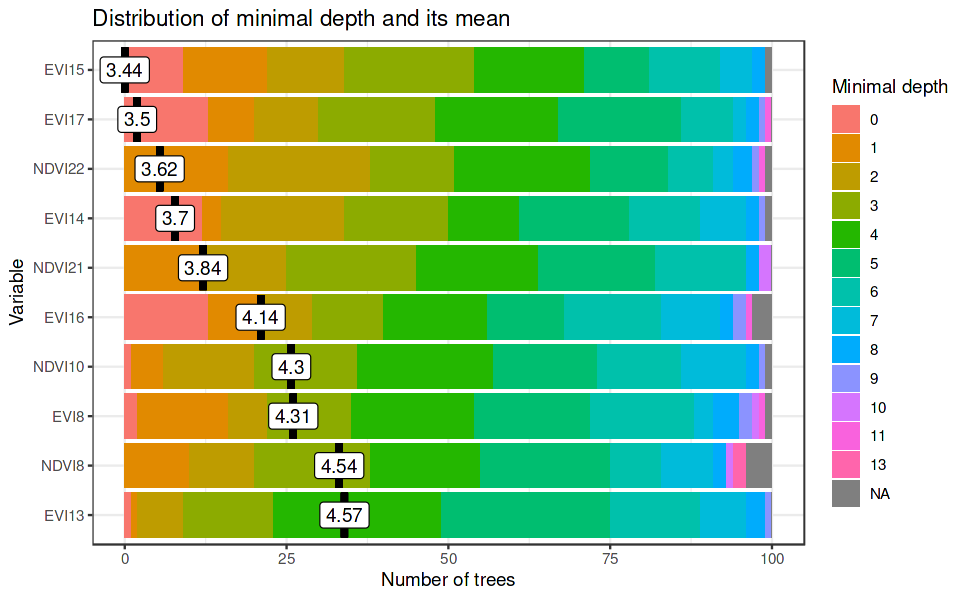

In [20]:
# select the bands "ndvi", "evi"
samples_2bands <- sits_select(
  data = samples_matogrosso_mod13q1,
  bands = c("NDVI", "EVI")
)
# train a random forest model
rf_model <- sits_train(
  samples = samples_2bands,
  ml_method = sits_rfor()
)
# plot the most important variables of the model
plot(rf_model)

## Data cube classification
<hr style="border:1px solid #0077b9;">

In [21]:
getwd()

[1] "/kaggle/working"

In [22]:
sits_labels(rf_model)

[1] "Cerrado"       "Fallow_Cotton" "Forest"        "Pasture"      
[5] "Soy_Corn"      "Soy_Cotton"    "Soy_Fallow"    "Soy_Millet"   
[9] "Soy_Sunflower"

  |======================================================================| 100%


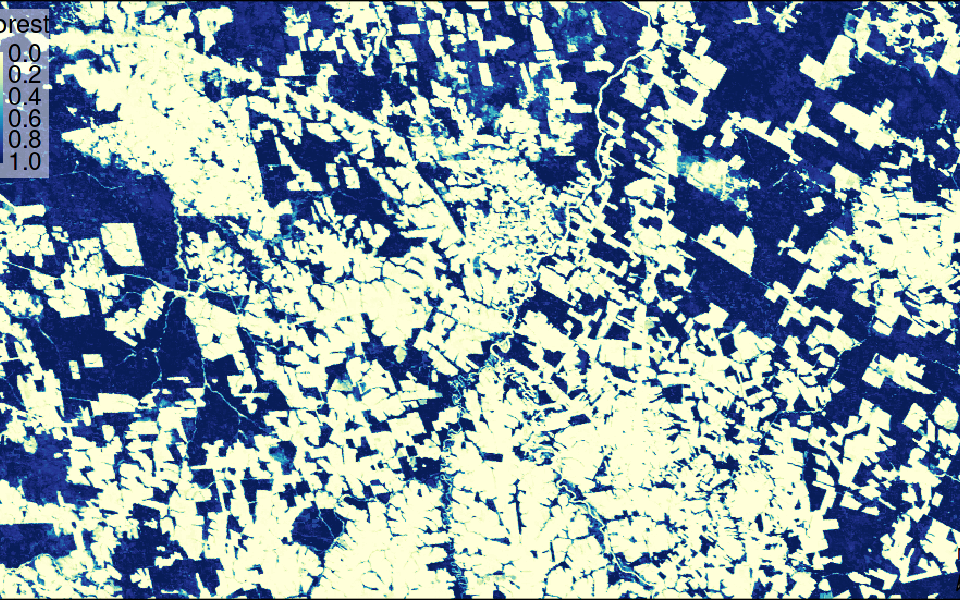

In [23]:
# classify the raster image
sinop_probs <- sits_classify(
  data = sinop,
  ml_model = rf_model,
  output_dir = getwd()
)
# plot the probability cube for class Forest
plot(sinop_probs, labels = "Forest")

In [24]:
uncert <- sits_uncertainty(cube = sinop_probs, output_dir = getwd())

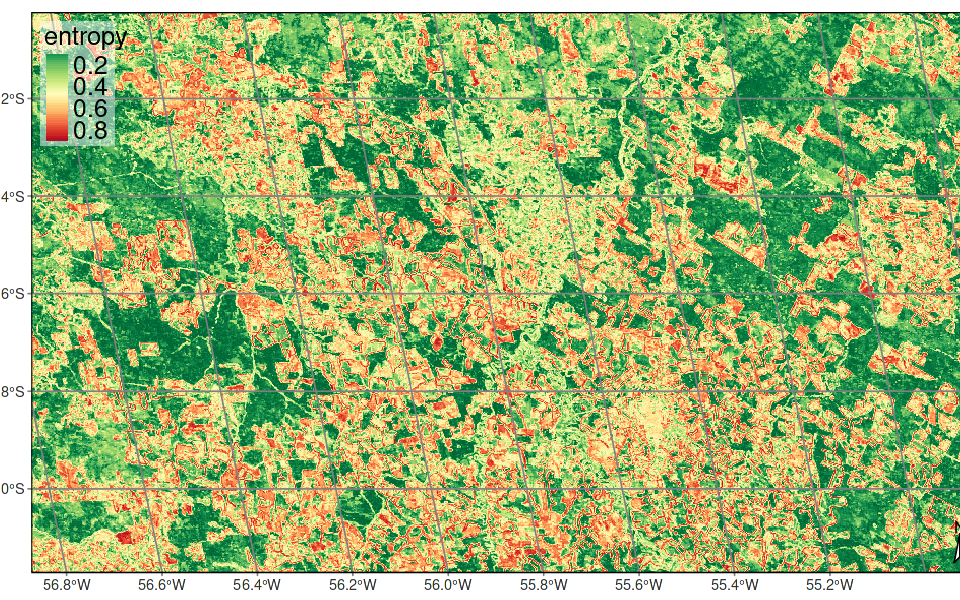

In [25]:
plot(uncert)

## Spatial smoothing
<hr style="border:1px solid #0077b9;">

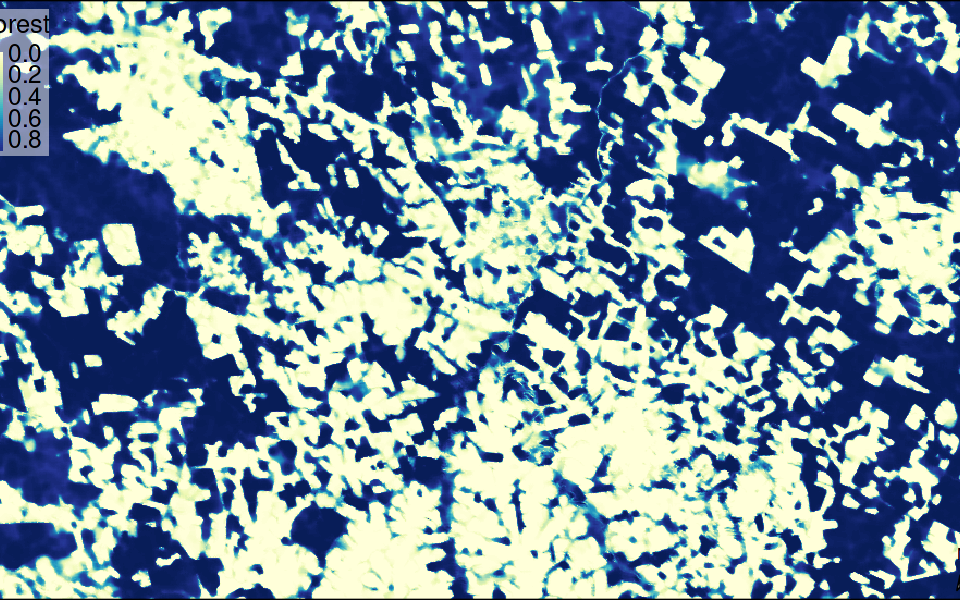

In [26]:
# perform spatial smoothing
sinop_bayes <- sits_smooth(
  cube = sinop_probs,
  output_dir = getwd()
)
plot(sinop_bayes, labels = c("Forest"))

## Labelling a probability data cube
<hr style="border:1px solid #0077b9;">

  |======================================================================| 100%


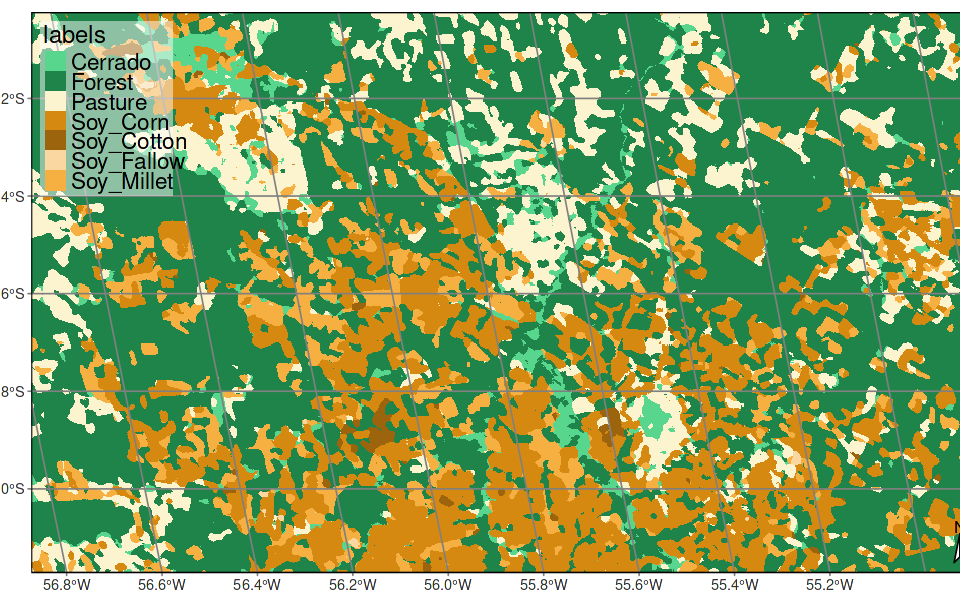

In [27]:
# label the probability file
sinop_map <- sits_label_classification(
  cube = sinop_bayes,
  output_dir = getwd()
)
plot(sinop_map, title = "Sinop Classification Map")

In [28]:
# show the location of the classification file
print(sinop_map$file_info[[1]])

# A tibble: 1 × 12
  band  start_date end_date   ncols nrows  xres  yres      xmin     xmax    ymin
  <chr> <date>     <date>     <dbl> <dbl> <dbl> <dbl>     <dbl>    <dbl>   <dbl>
1 class 2013-09-14 2014-08-29   944   551  232.  232. -6181982.  -5.96e6 -1.35e6
# … with 2 more variables: ymax <dbl>, path <chr>
